# Exploratory Data Analysis Starter

## Import packages

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [4]:
client_df = pd.read_csv('data/client_data.csv')
price_df = pd.read_csv('data/price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [5]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [6]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [7]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [8]:
#check churn

client_df['churn'].info()

client_df['has_gas'].info()

client_df['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14606 entries, 0 to 14605
Series name: churn
Non-Null Count  Dtype
--------------  -----
14606 non-null  int64
dtypes: int64(1)
memory usage: 114.2 KB
<class 'pandas.core.series.Series'>
RangeIndex: 14606 entries, 0 to 14605
Series name: has_gas
Non-Null Count  Dtype 
--------------  ----- 
14606 non-null  object
dtypes: object(1)
memory usage: 114.2+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 14606 entries, 0 to 14605
Series name: id
Non-Null Count  Dtype 
--------------  ----- 
14606 non-null  object
dtypes: object(1)
memory usage: 114.2+ KB


In [9]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [10]:
price_df['price_peak_var']

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
192997    0.102232
192998    0.102232
192999    0.102232
193000    0.102232
193001    0.102232
Name: price_peak_var, Length: 193002, dtype: float64

### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [11]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [12]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

In [13]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectangles/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

In [14]:
#f = gas_client[gas_client['has_gas'== "f"]]
#gas_client = gas_client['churn']
#gas_churn = gas_client['gas_client' == 't']
#class_23 = titanic[(titanic["Pclass"] == 2) | (titanic["Pclass"] == 3)
#gas_churn

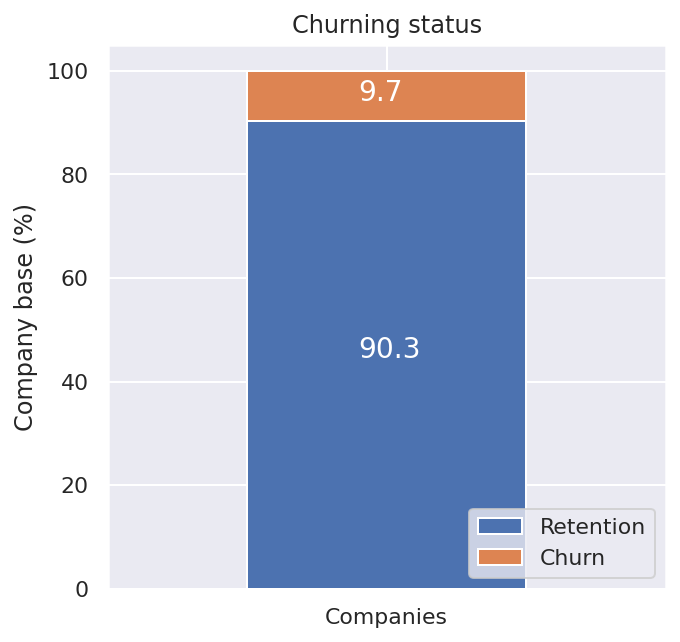

In [15]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

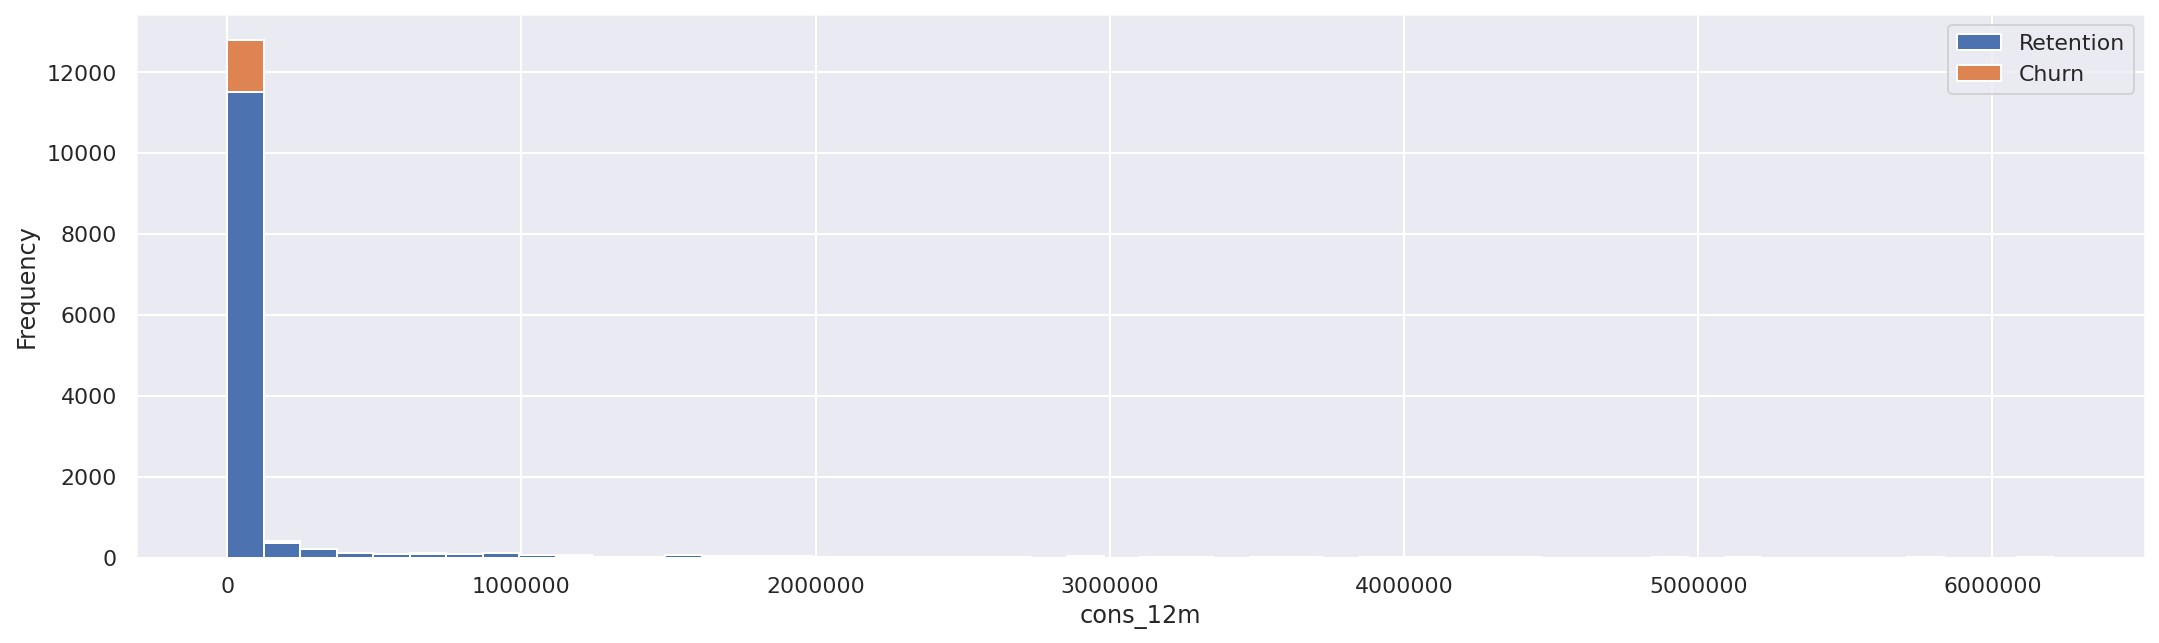

In [16]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

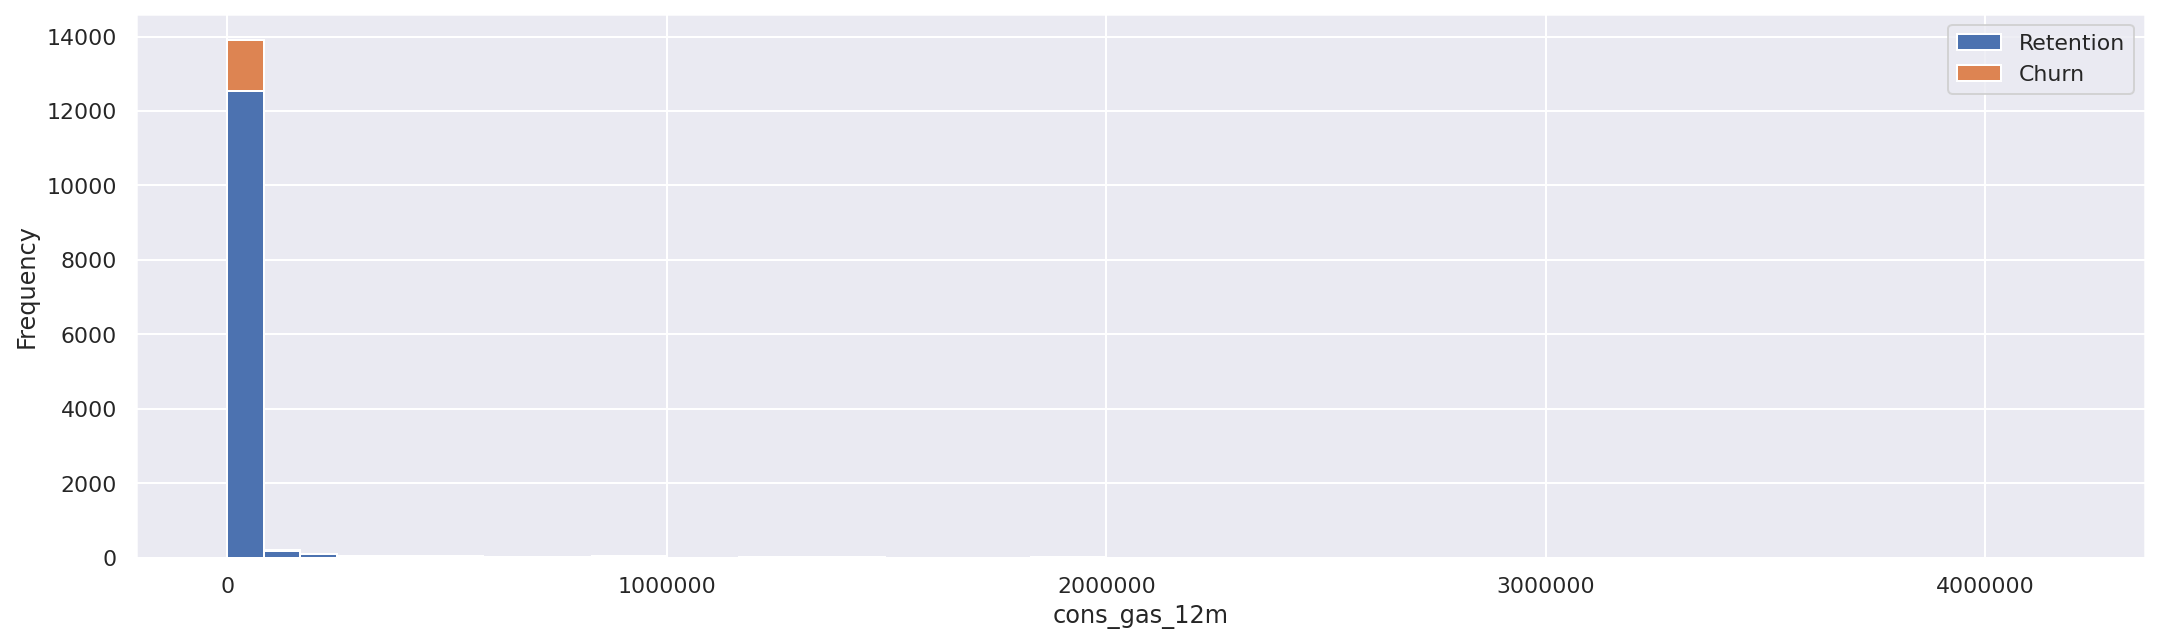

In [17]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 5))
plot_distribution(consumption, 'cons_gas_12m', axs)

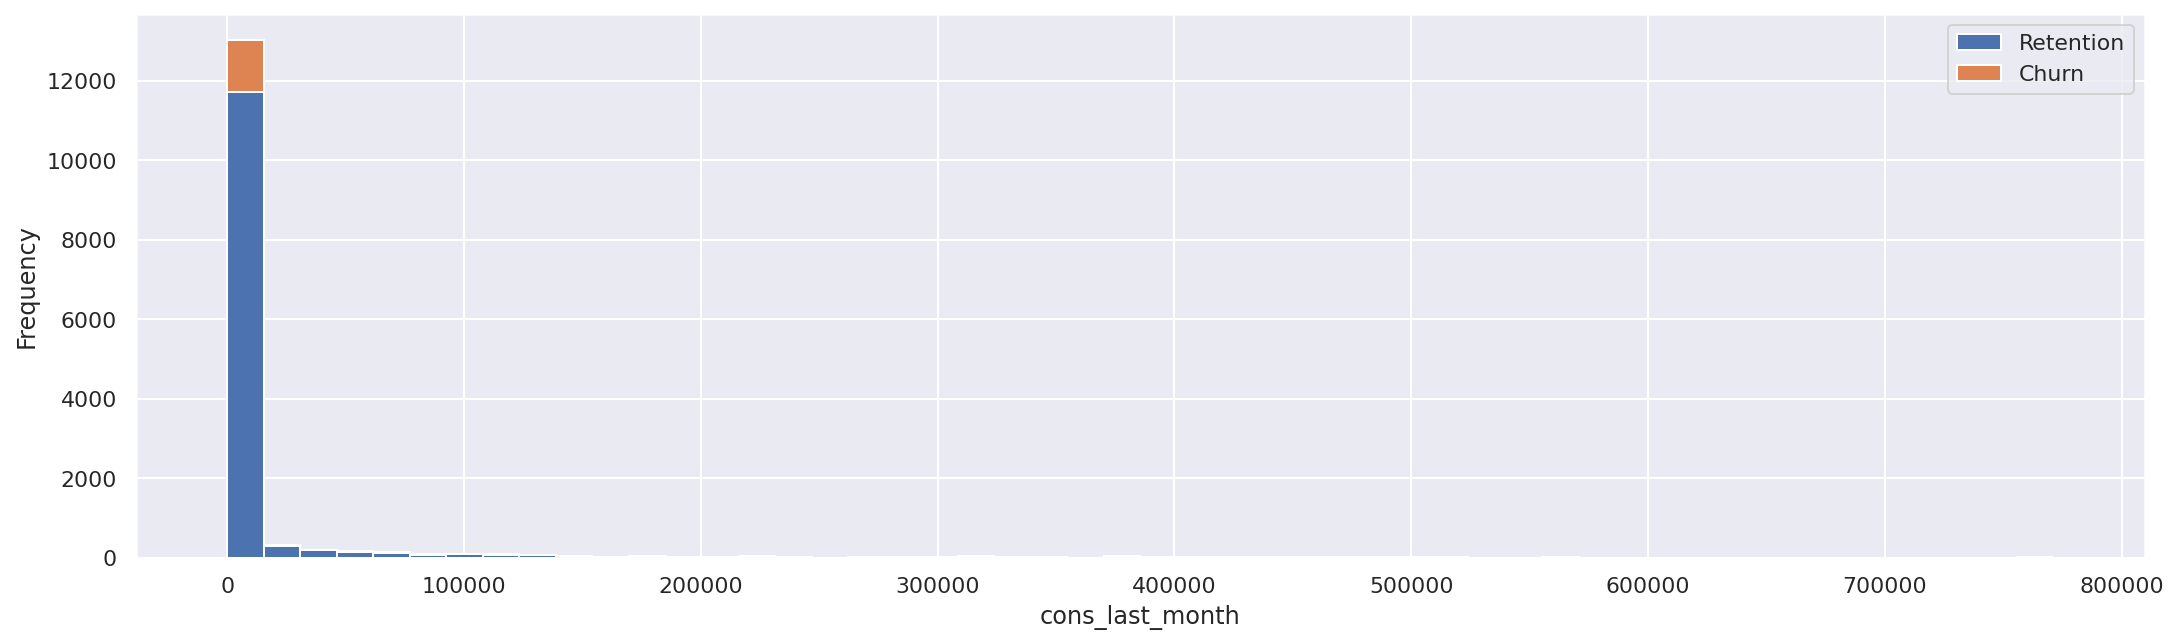

In [18]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 5))
#plot_distribution(consumption, 'cons_gas_12m', axs)

plot_distribution(consumption, 'cons_last_month', axs)

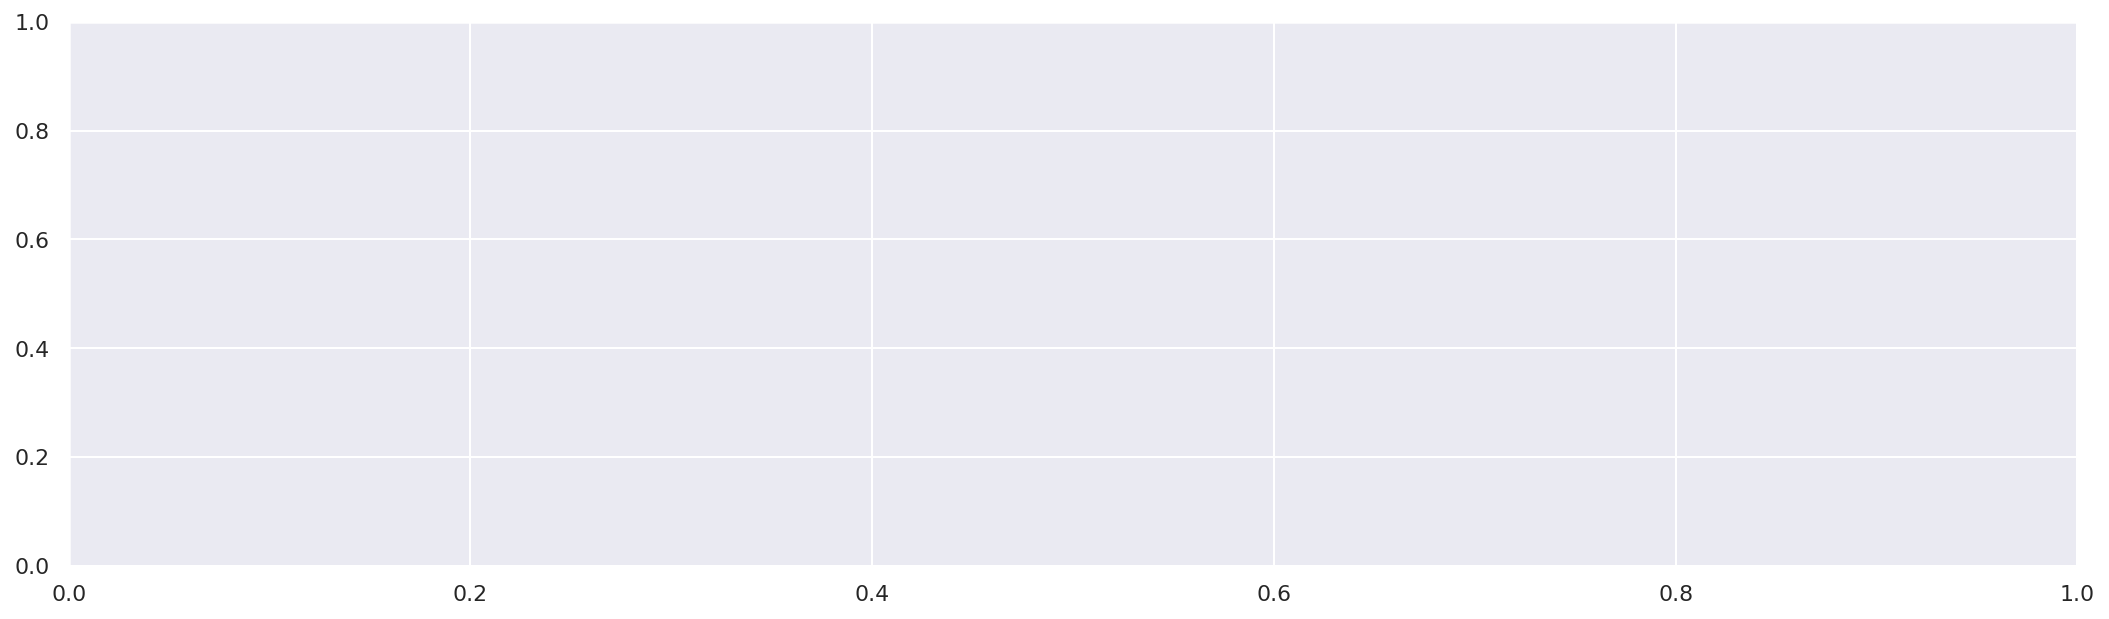

In [19]:

fig, axes = plt.subplots(nrows=1,figsize = (18,5))



forecast = client_df[['id', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak','forecast_price_energy_peak' , 'forecast_price_pow_off_peak', 'has_gas', 'churn']]

plot_distribution(forecast, 'forecast_price_energy_off_peak', axs)
#plot_distribution(forecast, 'forecast_cons_12m', axs)
#plot_distribution(forecast, 'forecast_cons_12m', axs)
#plot_distribution(forecast, 'forecast_cons_12m', axs)

In [20]:
forecast.head(3)

,id,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,1
1,d29c2c54acc38ff3c0614d0a653813dd,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0
2,764c75f661154dac3a6c254cd082ea7d,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0


Let's check the number of gas clients and the percentage that have churned


In [21]:
gas_client = client_df[['id', 'has_gas','churn']]
#class_23 = titanic[(titanic["Pclass"] == 2) | (titanic["Pclass"] == 3)
gas_client.columns = ['Companies', 'has_gas','churn']
gas_total = gas_client.groupby(gas_client['has_gas']).count().reset_index()
gas_total = gas_total.mask(gas_total["has_gas"] == 'f')
gas_total.dropna()

,has_gas,Companies,churn
1,t,2651.0,2651.0


In [22]:
gas_clientz = client_df[['id', 'has_gas']]
#class_23 = titanic[(titanic["Pclass"] == 2) | (titanic["Pclass"] == 3)
gas_clientz.columns = ['Companies', 'has_gas']
gas_totalz = gas_clientz.groupby(gas_clientz['has_gas']).count()
gas_totalz = gas_client.groupby(gas_client['has_gas']).count().reset_index()
gas_totalz = gas_totalz.mask(gas_totalz["has_gas"] == 'f')
#gas_totalz =  gas_totalz.mask(gas_clientz["has_gas"] == 'f')
#gas_totalz.dropna()
gas_totalz = gas_totalz.loc[:, gas_totalz.columns != 'has_gas']
gas_totalz.dropna()

,Companies,churn
1,2651.0,2651.0


Let's us find the number of retained clients that are gas clients. Was the greater percentage of the gas clients those that churned or those that remained customers?

In [23]:
gas_client = client_df[['id', 'has_gas', 'churn']]
gas_client.columns = ['Companies', 'has_gas','churn']
#gas = gas_client.groupby(['churn','has_gas'])#.agg({'count':sum})
#gas_client = gas_client[gas_client['churn'].convert_dtypes(convert_boolean=True)]
gas_client = gas_client.mask(gas_client["churn"] == 1) # mask clients churned
gas_retention = gas_client.mask(gas_client["has_gas"] == 'f') #then mask those who have gas
gas_retention.dropna()
gas_client.count()
gas_retention.count() #this gives us a total of the retained gas_clients.

Companies    2434
has_gas      2434
churn        2434
dtype: int64

In [24]:
gas_percentage = gas_retention.count() / gas_totalz * 100
gas_percentage = gas_percentage.loc[:, gas_percentage.columns != 'has_gas']
gas_percentage = gas_percentage.loc[:, ~gas_percentage.columns.isin(['has_gas', 'churn'])]
gas_percentage.dropna()

,Companies
1,91.81441


We can conclude most of their gas clients are satisfied. Over 90% of the gas clients remained in the company.

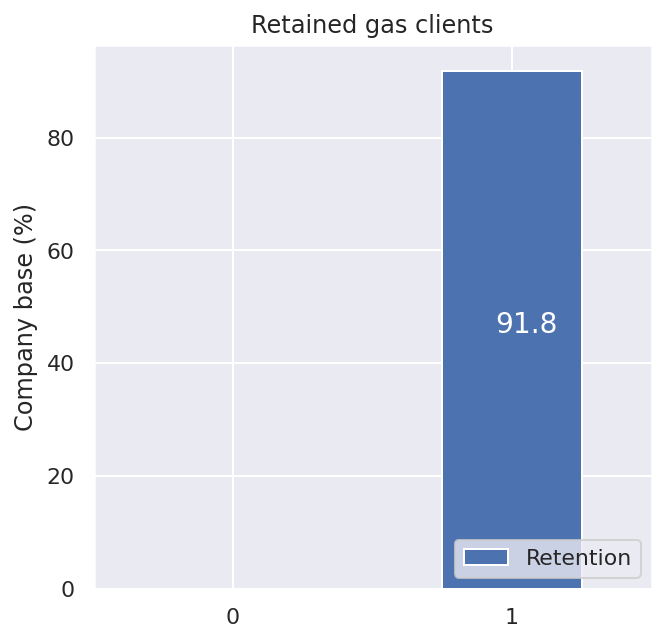

In [25]:
plot_stacked_bars(gas_percentage, "Retained gas clients", (5, 5), legend_="lower right")

### Predictive modelling

We want to test the hypothesis whether price sensitivity affects client_churn. We will be using a logistic regression model.

In [26]:
result = pd.concat([client_df, price_df], axis=1, join="inner")
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [27]:
result.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,pow_max,churn,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,43.648,1,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,13.800,0,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,13.856,0,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


We will clean the joined table for processing and predicicting

In [28]:
result = result.mask(result["channel_sales"] == 'MISSING') # mask missing values from channel_sales
result = result.dropna()

In [29]:
result['churn'].dropna()

0        1.0
2        0.0
3        0.0
5        1.0
6        1.0
        ... 
14600    0.0
14601    0.0
14602    1.0
14603    1.0
14604    0.0
Name: churn, Length: 10881, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


#Select our target and independent variables

y = result['churn']
X = result[['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix','price_peak_fix', 'price_mid_peak_fix']]

#split the datasets for trainif and testing to assess the model's performance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize the logistic regression model

model = LogisticRegression()

#model = HistGradientBoostingClassifier(random_state=42)

#Fit the model to the the training data

model.fit(X_train, y_train)

#Make predictions on the test set

predictions = model.predict(X_test)


#Asses the model performance

accuracy = accuracy_score(y_test, predictions)
confusion_mat = confusion_matrix(y_test, predictions)



print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion_mat}')

Accuracy: 0.9058337161231051
Confusion Matrix:
[[1972    0]
 [ 205    0]]


While our model has a high accuracy of 89.56% meaning it correctly predicited a churn or nun churn, the confusion matrix iindicates it's not prediciton any instances of Churn( 0 True positives ). The model is effectively predicting instances of non-churn but not churning itself.

In [31]:
coefficients = model.coef_
feature_names = X.columns
for feature, coef in zip(feature_names, coefficients[0]):
    print(f"{feature}: {coef}")

price_off_peak_var: 0.17419906386954198
price_peak_var: 1.258683104138749
price_mid_peak_var: 0.07333840538009209
price_off_peak_fix: -0.007433230114255447
price_peak_fix: -0.008116950045849523
price_mid_peak_fix: 0.008714275849367495


In [32]:
y_true = result['churn']
y_pred_prob = model.predict_proba(X)[:, 1]  # Probabilities of the positive class
y_pred = (y_pred_prob > 0.5).astype(int)  # Applying a threshold of 0.5

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc_roc = roc_auc_score(y_true, y_pred_prob)


print(f'precision: {precision}')
print(f'recall:{recall}')
print(f'f1: {f1}')
print(f'auc_roc: {auc_roc}')

precision: 0.0
recall:0.0
f1: 0.0
auc_roc: 0.5275435579097985


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Interpreting our findings

While our model has a high accuracy of 89.56% meaning it correctly predicited a churn or nun churn, the confusion matrix iindicates it's not prediciton any instances of Churn( 0 True positives ). The model is effectively predicting instances of non-churn but not churning itself. With a preciton,recall and F1 score 0f 0, our model fails to correctly predict instances of churning. We will need to further investigate the data or tweak our model.

### Conclusions

From the above model we can not conclude that price sensitivity impact customer churn.